In [1]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from hyperdash import Experiment 

import plotly
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
from plotly import tools

In [12]:
""" import os

directory_list = list()
for root, dirs, files in os.walk("field/", topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(name))

#print(directory_list)

for name in directory_list:
    os.system('! mkdir VAL/{}'.format(name))
    os.system('! mkdir TEST/{}'.format(name))
    os.system('! mkdir TRAIN/{}'.format(name))
    
""" 

TEST/:
abies_concolor		  malus_floribunda
abies_nordmanniana	  malus_hupehensis
acer_campestre		  malus_pumila
acer_ginnala		  metasequoia_glyptostroboides
acer_griseum		  morus_alba
acer_negundo		  morus_rubra
acer_palmatum		  nyssa_sylvatica
acer_pensylvanicum	  ostrya_virginiana
acer_platanoides	  oxydendrum_arboreum
acer_pseudoplatanus	  paulownia_tomentosa
acer_rubrum		  phellodendron_amurense
acer_saccharinum	  picea_abies
acer_saccharum		  picea_orientalis
aesculus_flava		  picea_pungens
aesculus_glabra		  pinus_bungeana
aesculus_hippocastamon	  pinus_cembra
aesculus_pavi		  pinus_densiflora
ailanthus_altissima	  pinus_echinata
albizia_julibrissin	  pinus_flexilis
amelanchier_arborea	  pinus_koraiensis
amelanchier_canadensis	  pinus_nigra
amelanchier_laevis	  pinus_parviflora
asimina_triloba		  pinus_peucea
betula_alleghaniensis	  pinus_pungens
betula_jacqemontii	  pinus_resinosa
betula_lenta		  pinus_rigida
betula_nigra		  pinus_strobus
betula_populifolia	  pinus_sylvestris
bro

In [14]:
 """IMG_PATH = 'field/'

for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 2:
                shutil.copy(img, 'TEST/' + CLASS + '/' + FILE_NAME)
            elif n < 0.7*IMG_NUM:
                shutil.copy(img, 'TRAIN/'+ CLASS + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'VAL/'+ CLASS + '/' + FILE_NAME)
                
                """

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model  
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2D , Activation , MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop , Adam
import numpy as np
import matplotlib.pyplot as plt
import fnmatch
import os 
import cv2
import random
import matplotlib.image as mpimg

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.applications import  inception_v3, resnet50, mobilenet
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.preprocessing import image
from keras.optimizers import SGD

#ignore all Warnings
import warnings; warnings.simplefilter('ignore')

Using TensorFlow backend.


In [3]:
img_width, img_height =  150, 150
train_data_dir = 'TRAIN'
validation_data_dir='VAL'
test_data_dir='TEST'

batch_size = 32
epochs = 20

In [3]:
vgg_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(img_width, img_height, 3))

for layer in vgg_model.layers[:-1]:
    layer.trainable = False

W0227 22:04:51.478954 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0227 22:04:51.515224 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0227 22:04:51.521267 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0227 22:04:51.595095 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0227 22:04:52.

In [4]:
for layer in vgg_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f26895c2c50> False
<keras.layers.convolutional.Conv2D object at 0x7f26895dcb38> False
<keras.layers.convolutional.Conv2D object at 0x7f26896560f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f26805b4e10> False
<keras.layers.convolutional.Conv2D object at 0x7f26805b4630> False
<keras.layers.convolutional.Conv2D object at 0x7f2680572780> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2680572f60> False
<keras.layers.convolutional.Conv2D object at 0x7f268058dc18> False
<keras.layers.convolutional.Conv2D object at 0x7f268053f2e8> False
<keras.layers.convolutional.Conv2D object at 0x7f268055b518> False
<keras.layers.pooling.MaxPooling2D object at 0x7f26804f7ef0> False
<keras.layers.convolutional.Conv2D object at 0x7f26804f76d8> False
<keras.layers.convolutional.Conv2D object at 0x7f268d120748> False
<keras.layers.convolutional.Conv2D object at 0x7f26895bfa20> False
<keras.layers.pooling.MaxPooling2D object at 0x7f26895dff98>

In [5]:
model = Sequential()
 
    
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(184, activation='softmax'))

model.summary()

W0227 22:04:56.421988 139805392385856 deprecation.py:506] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 184)               188600    
Total params: 19,622,904
Trainable params: 4,908,216
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_batchsize = 10
val_batchsize = 10


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical')



Found 5116 images belonging to 184 classes.
Found 368 images belonging to 184 classes.
Found 2235 images belonging to 184 classes.


In [8]:
import datetime
from keras.callbacks import TensorBoard



model.compile(fil
    loss='categorical_crossentropy',
    optimizer=SGD(lr=0.001),   
    metrics=['accuracy']
)

tensorboard = TensorBoard(
  log_dir='logs/scalars/',
  histogram_freq=0,
  write_images=True
)
keras_callbacks = [tensorboard]

training = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,
      callbacks=keras_callbacks,
      verbose=1)   

model.save('CNN_VGGNET.h5')

W0227 22:06:45.195292 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0227 22:06:46.954929 139805392385856 deprecation.py:323] From /home/stephen/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0227 22:06:47.520382 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0227 22:06:47.521667 139805392385856 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/callbacks.py:853

Epoch 1/100
50/50 [==============================] - 10s 191ms/step - loss: 15.0252 - acc: 0.0200 - val_loss: 5.3753 - val_acc: 0.0100
Epoch 2/100
50/50 [==============================] - 9s 174ms/step - loss: 15.0606 - acc: 0.0220 - val_loss: 5.3630 - val_acc: 0.0100
Epoch 3/100
50/50 [==============================] - 9s 177ms/step - loss: 14.5241 - acc: 0.0540 - val_loss: 5.4569 - val_acc: 0.0100
Epoch 4/100
50/50 [==============================] - 9s 183ms/step - loss: 14.5047 - acc: 0.0560 - val_loss: 5.3516 - val_acc: 0.0300
Epoch 5/100
50/50 [==============================] - 9s 181ms/step - loss: 14.3848 - acc: 0.0620 - val_loss: 5.3118 - val_acc: 0.0400
Epoch 6/100
50/50 [==============================] - 9s 180ms/step - loss: 14.0188 - acc: 0.0720 - val_loss: 5.3825 - val_acc: 0.0200
Epoch 7/100
50/50 [==============================] - 10s 192ms/step - loss: 14.0227 - acc: 0.0760 - val_loss: 5.1633 - val_acc: 0.0400
Epoch 8/100
50/50 [==============================] - 9s 186m

Epoch 62/100
50/50 [==============================] - 9s 189ms/step - loss: 3.0508 - acc: 0.3487 - val_loss: 5.0731 - val_acc: 0.0500
Epoch 63/100
50/50 [==============================] - 10s 194ms/step - loss: 3.0928 - acc: 0.3200 - val_loss: 5.0750 - val_acc: 0.0400
Epoch 64/100
50/50 [==============================] - 10s 195ms/step - loss: 3.0696 - acc: 0.3440 - val_loss: 5.1006 - val_acc: 0.0100
Epoch 65/100
50/50 [==============================] - 9s 181ms/step - loss: 3.0329 - acc: 0.3400 - val_loss: 5.1115 - val_acc: 0.0000e+00
Epoch 66/100
50/50 [==============================] - 10s 193ms/step - loss: 3.1660 - acc: 0.3260 - val_loss: 5.1363 - val_acc: 0.0100
Epoch 67/100
50/50 [==============================] - 9s 184ms/step - loss: 3.1448 - acc: 0.3220 - val_loss: 5.0951 - val_acc: 0.0400
Epoch 68/100
50/50 [==============================] - 9s 186ms/step - loss: 3.0719 - acc: 0.3400 - val_loss: 5.0834 - val_acc: 0.0526
Epoch 69/100
50/50 [==============================] - 1

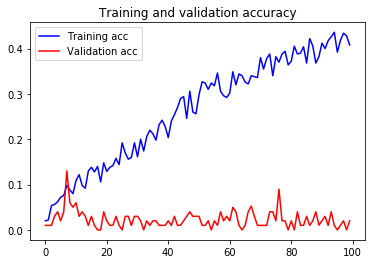

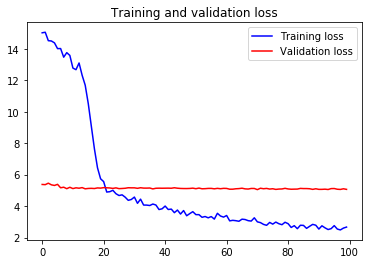

In [9]:
acc = training.history['acc']
val_acc = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [6]:
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import InceptionV3
from keras.applications import VGG19

In [7]:
inception = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

W0227 23:25:51.188385 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0227 23:25:51.199418 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0227 23:25:51.202024 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0227 23:25:51.216240 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session in

In [8]:
for layer in inception.layers[:-2]:
    layer.trainable = False

In [9]:
for layer in inception.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7d6c0cd390> False
<keras.layers.convolutional.Conv2D object at 0x7f7d6c0cdb00> False
<keras.layers.normalization.BatchNormalization object at 0x7f7d6c0cdb38> False
<keras.layers.core.Activation object at 0x7f7d6c0cddd8> False
<keras.layers.convolutional.Conv2D object at 0x7f7d6c0cde80> False
<keras.layers.normalization.BatchNormalization object at 0x7f7d6c3b1208> False
<keras.layers.core.Activation object at 0x7f7d6c0cdf98> False
<keras.layers.convolutional.Conv2D object at 0x7f7d6c337dd8> False
<keras.layers.normalization.BatchNormalization object at 0x7f7d6c3244a8> False
<keras.layers.core.Activation object at 0x7f7d6c2a5eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7d6c337400> False
<keras.layers.convolutional.Conv2D object at 0x7f7d6c3b1470> False
<keras.layers.normalization.BatchNormalization object at 0x7f7d6c1c0128> False
<keras.layers.core.Activation object at 0x7f7d6c241a20> False
<keras.layers.convolutional.Conv

In [10]:
model = Sequential()
 
    
model.add(inception)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(184, activation='softmax'))

model.summary()

W0227 23:26:27.729623 140178772424512 deprecation.py:506] From /home/stephen/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              18875392  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 184)               188600    
Total params: 40,866,776
Trainable params: 19,063,992
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# run dataget and aug  code from above 

In [11]:
import datetime
from keras.callbacks import TensorBoard



model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(lr=0.001),   
    metrics=['accuracy']
)

tensorboard = TensorBoard(
  log_dir='logs/scalars/',
  histogram_freq=0,
  write_images=True
)
keras_callbacks = [tensorboard]

training = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=500,
      validation_data=validation_generator,
      validation_steps=10,
      callbacks=keras_callbacks,
      verbose=1)   

model.save('inception.h5')

W0227 23:27:26.480110 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0227 23:27:26.874310 140178772424512 deprecation.py:323] From /home/stephen/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0227 23:27:28.928673 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0227 23:27:28.929332 140178772424512 deprecation_wrapper.py:119] From /home/stephen/.local/lib/python3.7/site-packages/keras/callbacks.py:853

Epoch 1/500
50/50 [==============================] - 6s 129ms/step - loss: 5.7551 - acc: 0.0020 - val_loss: 5.7975 - val_acc: 0.0100
Epoch 2/500
50/50 [==============================] - 4s 71ms/step - loss: 5.5851 - acc: 0.0120 - val_loss: 5.6763 - val_acc: 0.0000e+00
Epoch 3/500
50/50 [==============================] - 4s 84ms/step - loss: 5.3223 - acc: 0.0120 - val_loss: 5.1456 - val_acc: 0.0500
Epoch 4/500
50/50 [==============================] - 4s 83ms/step - loss: 5.2665 - acc: 0.0160 - val_loss: 5.2187 - val_acc: 0.0200
Epoch 5/500
50/50 [==============================] - 4s 83ms/step - loss: 5.2797 - acc: 0.0140 - val_loss: 5.2295 - val_acc: 0.0200
Epoch 6/500
50/50 [==============================] - 4s 83ms/step - loss: 5.2255 - acc: 0.0160 - val_loss: 5.4276 - val_acc: 0.0400
Epoch 7/500
50/50 [==============================] - 4s 83ms/step - loss: 5.1487 - acc: 0.0300 - val_loss: 5.1960 - val_acc: 0.0500
Epoch 8/500
50/50 [==============================] - 4s 84ms/step - los

50/50 [==============================] - 5s 91ms/step - loss: 3.2565 - acc: 0.2720 - val_loss: 3.8664 - val_acc: 0.1900
Epoch 124/500
50/50 [==============================] - 5s 90ms/step - loss: 3.1365 - acc: 0.3040 - val_loss: 3.5889 - val_acc: 0.2400
Epoch 125/500
50/50 [==============================] - 4s 89ms/step - loss: 3.1388 - acc: 0.3100 - val_loss: 3.6337 - val_acc: 0.2100
Epoch 126/500
50/50 [==============================] - 5s 90ms/step - loss: 3.2145 - acc: 0.3040 - val_loss: 3.8050 - val_acc: 0.1800
Epoch 127/500
50/50 [==============================] - 5s 93ms/step - loss: 3.1407 - acc: 0.3100 - val_loss: 3.6899 - val_acc: 0.1900
Epoch 128/500
50/50 [==============================] - 5s 91ms/step - loss: 3.0022 - acc: 0.3300 - val_loss: 3.1263 - val_acc: 0.3300
Epoch 129/500
50/50 [==============================] - 4s 89ms/step - loss: 3.2042 - acc: 0.2820 - val_loss: 3.1583 - val_acc: 0.2900
Epoch 130/500
50/50 [==============================] - 5s 96ms/step - loss: 

50/50 [==============================] - 5s 92ms/step - loss: 2.3797 - acc: 0.4220 - val_loss: 3.1550 - val_acc: 0.2500
Epoch 246/500
50/50 [==============================] - 5s 92ms/step - loss: 2.5225 - acc: 0.3714 - val_loss: 3.0503 - val_acc: 0.3600
Epoch 247/500
50/50 [==============================] - 5s 94ms/step - loss: 2.3260 - acc: 0.4200 - val_loss: 3.0717 - val_acc: 0.2737
Epoch 248/500
50/50 [==============================] - 5s 92ms/step - loss: 2.3658 - acc: 0.4040 - val_loss: 3.0406 - val_acc: 0.2900
Epoch 249/500
50/50 [==============================] - 5s 93ms/step - loss: 2.4278 - acc: 0.3960 - val_loss: 3.2826 - val_acc: 0.3100
Epoch 250/500
50/50 [==============================] - 5s 93ms/step - loss: 2.2785 - acc: 0.4540 - val_loss: 3.1409 - val_acc: 0.2900
Epoch 251/500
50/50 [==============================] - 5s 93ms/step - loss: 2.3115 - acc: 0.4260 - val_loss: 2.7305 - val_acc: 0.3700
Epoch 252/500
50/50 [==============================] - 5s 93ms/step - loss: 

50/50 [==============================] - 5s 92ms/step - loss: 1.9922 - acc: 0.4760 - val_loss: 2.8419 - val_acc: 0.3900
Epoch 368/500
50/50 [==============================] - 5s 90ms/step - loss: 1.9377 - acc: 0.5140 - val_loss: 2.9055 - val_acc: 0.3400
Epoch 369/500
50/50 [==============================] - 4s 89ms/step - loss: 1.9272 - acc: 0.4913 - val_loss: 3.2920 - val_acc: 0.2400
Epoch 370/500
50/50 [==============================] - 5s 97ms/step - loss: 2.0567 - acc: 0.4700 - val_loss: 3.6196 - val_acc: 0.2600
Epoch 371/500
50/50 [==============================] - 5s 94ms/step - loss: 1.8833 - acc: 0.5420 - val_loss: 3.3531 - val_acc: 0.3200
Epoch 372/500
50/50 [==============================] - 5s 93ms/step - loss: 2.1371 - acc: 0.4460 - val_loss: 3.0689 - val_acc: 0.3100
Epoch 373/500
50/50 [==============================] - 5s 93ms/step - loss: 1.9023 - acc: 0.4920 - val_loss: 2.6790 - val_acc: 0.3900
Epoch 374/500
50/50 [==============================] - 5s 93ms/step - loss: 

50/50 [==============================] - 5s 94ms/step - loss: 1.7961 - acc: 0.5440 - val_loss: 3.5064 - val_acc: 0.2200
Epoch 490/500
50/50 [==============================] - 5s 91ms/step - loss: 1.6290 - acc: 0.5540 - val_loss: 2.6800 - val_acc: 0.3500
Epoch 491/500
50/50 [==============================] - 5s 93ms/step - loss: 1.8538 - acc: 0.4940 - val_loss: 3.3537 - val_acc: 0.3500
Epoch 492/500
50/50 [==============================] - 5s 93ms/step - loss: 1.8070 - acc: 0.5307 - val_loss: 3.1720 - val_acc: 0.3300
Epoch 493/500
50/50 [==============================] - 4s 90ms/step - loss: 1.7552 - acc: 0.5420 - val_loss: 3.1214 - val_acc: 0.3684
Epoch 494/500
50/50 [==============================] - 5s 92ms/step - loss: 1.6388 - acc: 0.5780 - val_loss: 3.3815 - val_acc: 0.3400
Epoch 495/500
50/50 [==============================] - 5s 92ms/step - loss: 1.7320 - acc: 0.5380 - val_loss: 3.5693 - val_acc: 0.3300
Epoch 496/500
50/50 [==============================] - 5s 96ms/step - loss: 

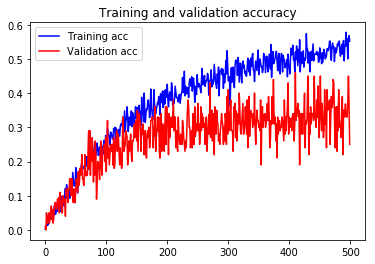

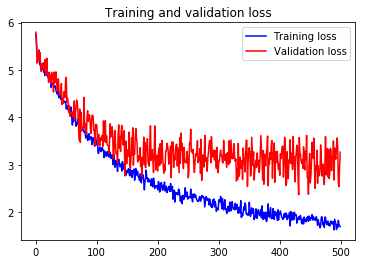

In [12]:
acc = training.history['acc']
val_acc = training.history['val_acc']
loss = training.history['loss']
val_loss = training.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()